# VGG-Face



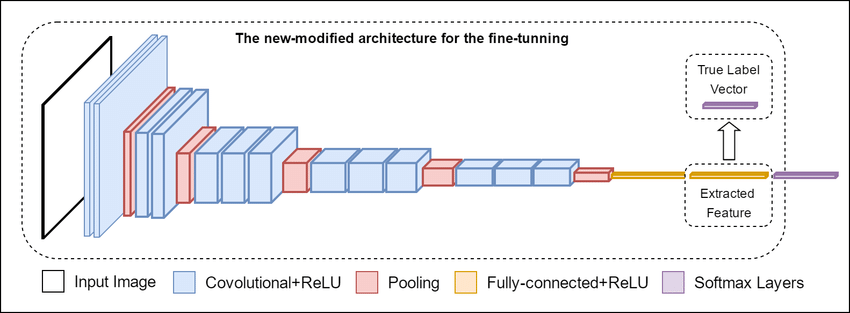

### Import Libraries

In [77]:
from tensorflow.keras.models import Model, Sequential, model_from_json
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation 
from PIL import Image
import numpy as np
from mtcnn import MTCNN
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

### VGG-Face Model

In [47]:
model = Sequential()

model.add(ZeroPadding2D((1,1),input_shape=(224,224,3)))
model.add(Convolution2D(64,(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128,(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256,(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256,(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512,(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512,(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512,(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512,(3,3),activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(Convolution2D(4096,(7,7),activation="relu"))
model.add(Dropout(0.5))
model.add(Convolution2D(4096,(1,1),activation="relu"))
model.add(Dropout(0.5))
model.add(Convolution2D(2622,(1,1)))
model.add(Flatten())
model.add(Activation("softmax"))


### Load the Model Weights

In [48]:
model.load_weights("vgg_face_weights.h5")

### Functions for Detect Face, Image Preproccess, Find Cosine Similarity

In [168]:
def detectFaces(img_path):
    img = Image.open(img_path)
    img_array = np.asarray(img)
    detector = MTCNN()
    face = detector.detect_faces(img_array)
    print(face)
    x, y, w, h = face[0]['box']
    cropped_face = img.crop((x, y, x+w, y+h))
    return cropped_face

In [119]:
def preprocess_image(img):
    new_size=(224,224)
    img = img.resize(new_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [50]:
def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation),test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1-(a/(np.sqrt(b) * np.sqrt(c)))

### Defining the VGG-Face Feature Extractor Model

In [63]:
model.layers[0], model.layers[-2]

(<ZeroPadding2D name=zero_padding2d_26, built=True>,
 <Flatten name=flatten_2, built=True>)

In [57]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [64]:
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor_1484>],
 [<KerasTensor shape=(None, 2622), dtype=float32, sparse=False, name=keras_tensor_2187>])

### Face Verification Function with Threshold Usage

In [172]:
threshold = 0.40

def verifyFace(img1, img2):
    detect_img1 = detectFaces(img1)
    detect_img2 = detectFaces(img2)
    img1_representation = vgg_face_descriptor.predict(preprocess_image(detect_img1))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image(detect_img2))[0,:]
    
    
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
    
    f = plt.figure()
    f.add_subplot(1,2,1)
    plt.imshow(Image.open(img1))
    plt.xticks([])
    plt.yticks([])
    f.add_subplot(1,2,2)
    plt.imshow(Image.open(img2))
    plt.xticks([])
    plt.yticks([])
    plt.show(block=True)
    
    print("Cosine Similarity:", cosine_similarity)
    
    if(cosine_similarity < threshold):
        print("They are same person")
    else:
        print("They are not same person")
    

### Verification Samples

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
[{'box': [138, 80, 354, 446], 'confidence': 0.9997429251670837, 'keypoints': {'left_eye': (202, 277), 'right_eye': (345, 233), 'nose': (274, 349), 'mouth_left': (245, 437), 'mouth_right': (382, 391)}}]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/s

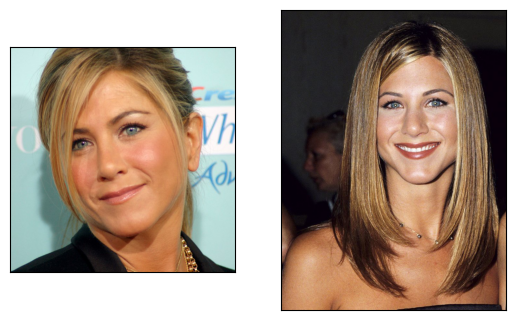

Cosine Similarity: 0.22150033712387085
They are same person


In [173]:
verifyFace("aniston2.jpg","aniston3.jpg" )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
[{'box': [138, 80, 354, 446], 'confidence': 0.9997429251670837, 'keypoints': {'left_eye': (202, 277), 'right_eye': (345, 233), 'nose': (274, 349), 'mouth_left': (245, 437), 'mouth_right': (382, 391)}}]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/s

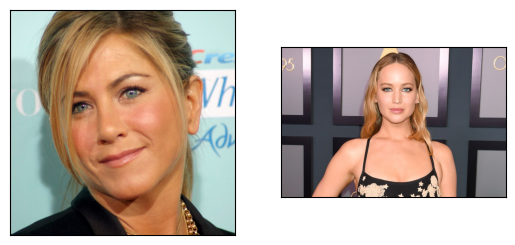

Cosine Similarity: 0.5892778635025024
They are not same person


In [174]:
verifyFace("aniston2.jpg","lawrence1.jpg" )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
[{'box': [184, 122, 223, 300], 'confidence': 0.9999681711196899, 'keypoints': {'left_eye': (222, 233), 'right_eye': (321, 250), 'nose': (244, 295), 'mouth_left': (207, 332), 'mouth_right': (305, 351)}}]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/s

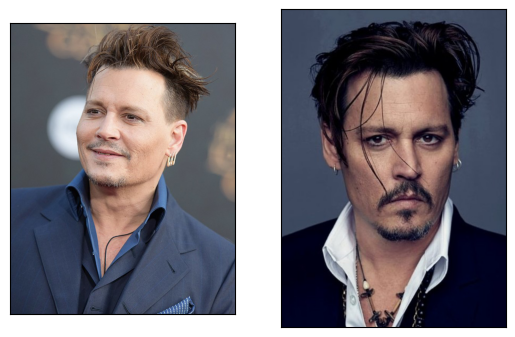

Cosine Similarity: 0.25497496128082275
They are same person


In [184]:
verifyFace("depp1.jpg","depp2.jpg" )